In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as date

%matplotlib inline

In [4]:
import pandas_datareader.data as web
import datetime 

In [8]:
startdate=datetime.datetime(2012,1,1)
enddate=datetime.datetime(2017,1,1)


tesla=web.DataReader("TSLA", "yahoo",startdate, enddate )

In [9]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450


In [35]:
ford=web.DataReader("F", "yahoo", startdate, enddate)
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.511252
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.625980
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.821692
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.902675
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.963414


In [12]:
gm=web.DataReader("GM", "yahoo", startdate, enddate)
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712


# Part 2: Visualizing the Data

Linear Plotting open prices for each stock. 

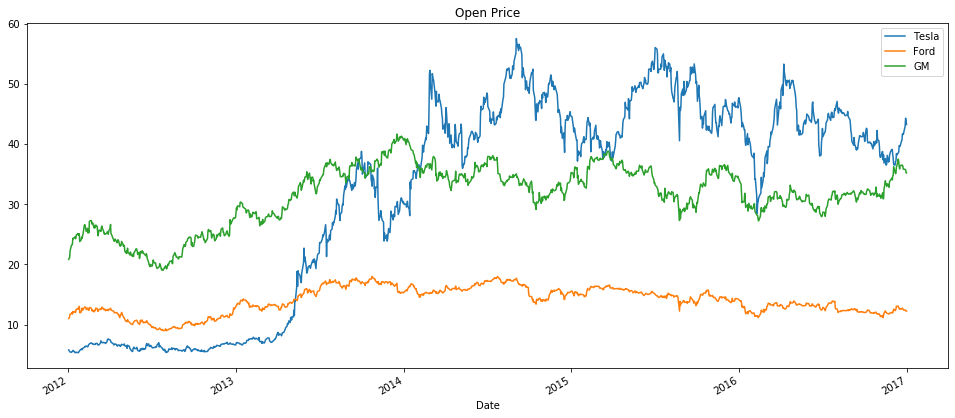

In [26]:
fig=plt.figure(figsize=(16,6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

tesla["Open"].plot(label="Tesla")
ford["Open"].plot(label="Ford")
gm["Open"].plot(label="GM")

axes.set_title("Open Price")
#plt.suptitle("Open Price")
plt.legend()

** Plotting the Volume of stock traded each day.*

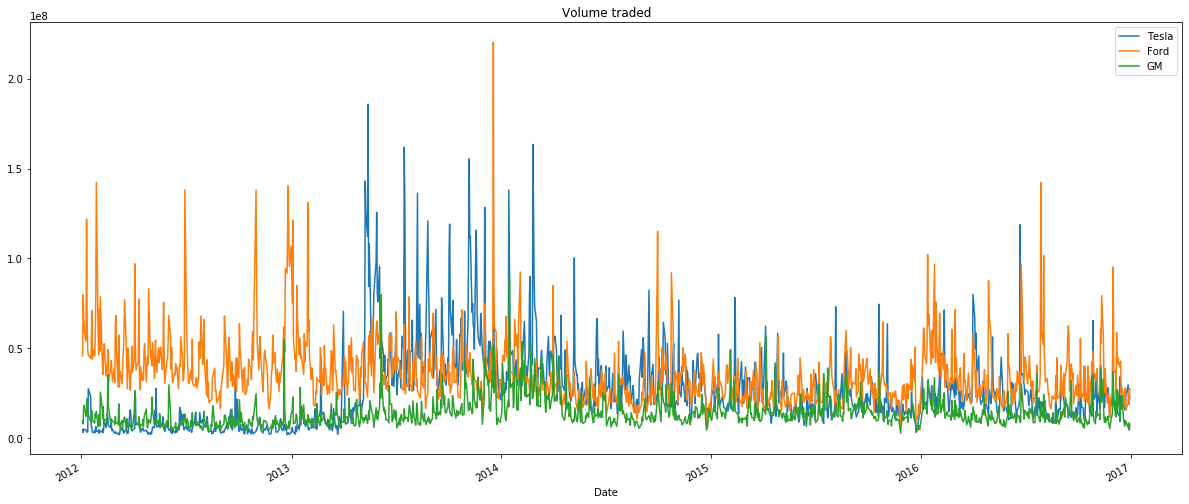

In [31]:
fig=plt.figure(figsize=(16,6))

axes=fig.add_axes([0,0,1,1])
axes.set_title ("Volume traded")

tesla["Volume"].plot(label="Tesla")
ford["Volume"].plot(label="Ford")
gm["Volume"].plot(label="GM")

plt.legend()

Trying to figure out what happened with Ford's stocks when the volume spiked.

In [39]:
ford["Volume"].max()

220363000.0

In [40]:
ford[ford["Volume"]==220363000.0]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-18,16.0,15.17,15.99,15.65,220363000.0,11.044733


What happened with Ford that day?

In [41]:
# The stock dropped after the company announced that next year's profits would likely fall short of Wall Street's expectations.

** Created a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [43]:
tesla["Total Traded"]=tesla["Volume"]*tesla["Open"]
gm["Total Traded"]=gm["Volume"]*gm["Open"]
ford["Total Traded"]=ford["Volume"]*ford["Open"]

Plotting this "Total Traded" against the time index.**

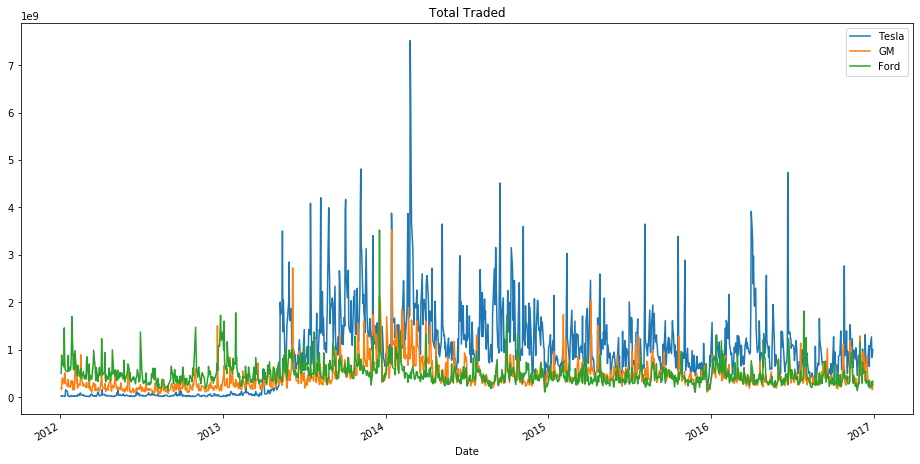

In [46]:

tesla["Total Traded"].plot(figsize=(16,8), title="Total Traded", label="Tesla")
gm["Total Traded"].plot(label="GM")
ford["Total Traded"].plot(label="Ford")

plt.legend()



Trying to see what happened in early 2014 with Tesla. It looks like there was huge amount of money traded for Tesla.

In [49]:
tesla["Total Traded"].max()

7516791000.0

In [50]:
tesla[tesla["Total Traded"]==7516791000.0]

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2014-02-25,51.84,45.689999,46.0,49.599998,163408500,49.599998,7.516791e+09


In [52]:
# The stock has gained more than 30% since Tesla (TSLA) reported much 
#stronger-than-expected profit and raised its sales targets last week.

*  Plotting out the MA50 and MA200 for GM. **

In [55]:
gm["MA50"]=gm["Open"].rolling(window=50).mean()
gm["MA200"]=gm["Open"].rolling(window=200).mean()

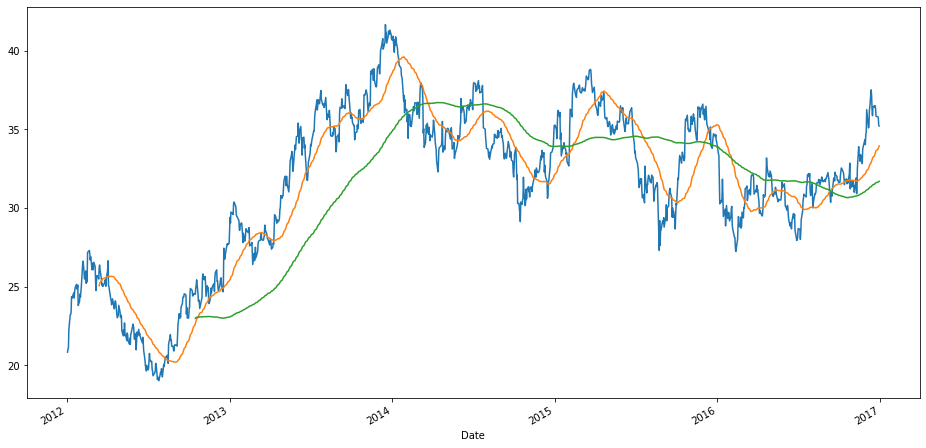

In [56]:
gm["Open"].plot(figsize=(16,8), label="Open")
gm["MA50"].plot(label="MA50")
gm["MA200"].plot(label="MA200")

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry.



In [57]:
from pandas.plotting import scatter_matrix

In [60]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.511252,5.028089e+08
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.625980,8.889359e+08
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.821692,7.690521e+08
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.902675,7.025298e+08
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.963414,6.386011e+08


In [66]:
open_comp=pd.concat([tesla["Open"], ford["Open"], gm["Open"]], axis=1)

In [68]:
open_comp.columns=["Tesla Open", "Ford Open", "GM Open"]

In [69]:
open_comp

,Tesla Open,Ford Open,GM Open
Date,,,
2012-01-03,5.788000,11.00,20.830000
2012-01-04,5.642000,11.15,21.049999
2012-01-05,5.552000,11.33,21.100000
2012-01-06,5.440000,11.74,22.260000
2012-01-09,5.400000,11.83,23.200001
...,...,...,...
2016-12-23,41.599998,12.43,35.830002
2016-12-27,42.976002,12.43,35.799999
2016-12-28,44.306000,12.37,35.740002


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF60FEB908>,
      dtype=object)

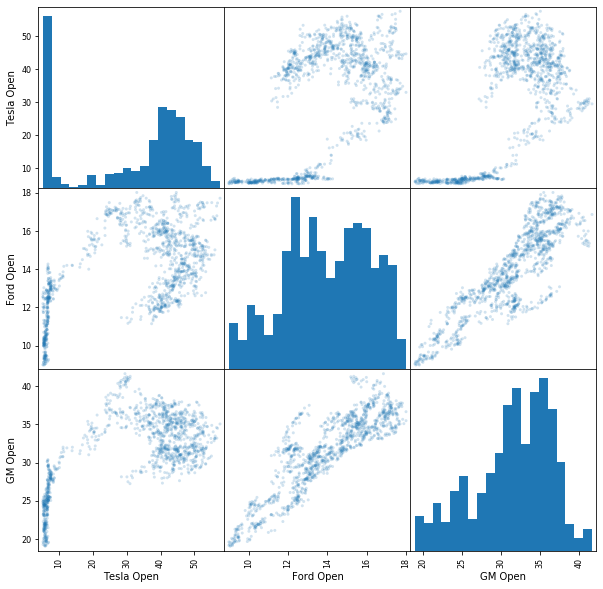

In [75]:
scatter_matrix(open_comp, figsize=(10,10), alpha=0.2,hist_kwds={"bins": 20 })

# Daily Percentage Change

** Let's create a new column for each dataframe called returns that will be the daily changes on the close prices on each dataframe.

In [80]:
tesla["Returns"]=tesla["Close"].pct_change(periods=1)
ford["Returns"]=ford["Close"].pct_change(periods=1)
gm["Returns"]=gm["Close"].pct_change(periods=1)

In [81]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns
Date,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,0.012635


In [82]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.511252,5.028089e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.625980,8.889359e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.821692,7.690521e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.902675,7.025298e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.963414,6.386011e+08,0.007686


In [83]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,Returns
Date,,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352,1.941627e+08,NaN,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853,1.653835e+08,NaN,NaN,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161,3.772807e+08,NaN,NaN,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915,4.059000e+08,NaN,NaN,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712,2.803604e+08,NaN,NaN,-0.003490


** Let's plot a histogram of each companies returns.

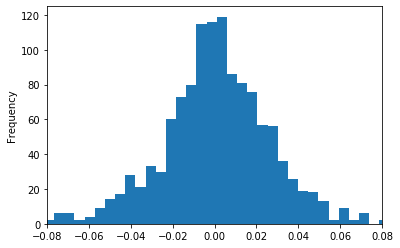

In [89]:
tesla["Returns"].plot.hist(bins=90, xlim=[-0.08, 0.08])

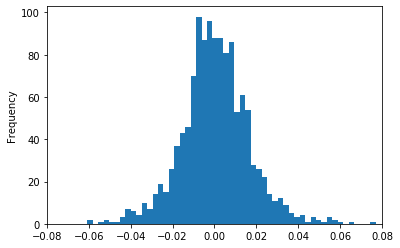

In [91]:
gm["Returns"].plot.hist(bins=60, xlim=[-0.08,0.08])

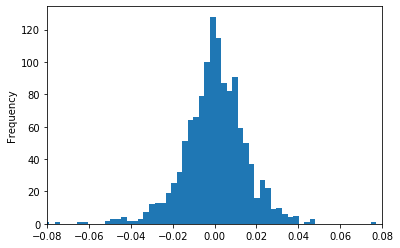

In [94]:
fig=plt.figure()

ford["Returns"].plot.hist(bins=60, xlim=[-0.08, 0.08])


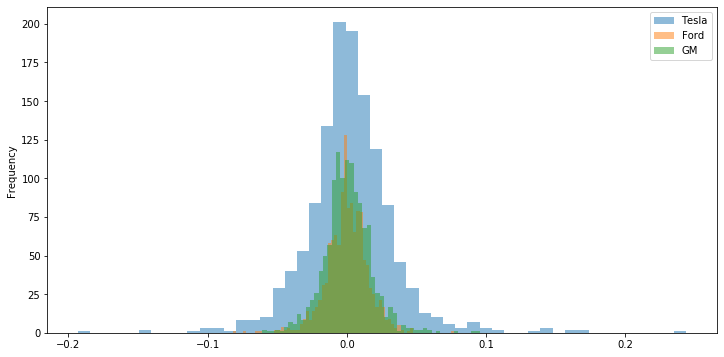

In [100]:
tesla["Returns"].plot.hist(bins=50, alpha=0.5, label="Tesla", figsize=(12,6))
ford["Returns"].plot.hist(alpha=0.5, label="Ford", bins=70)
gm["Returns"].plot.hist(alpha=0.5, label="GM", bins=50)

plt.legend()

* Plotting a KDE instead of histograms for another view point. Tesla has the widest plot. **

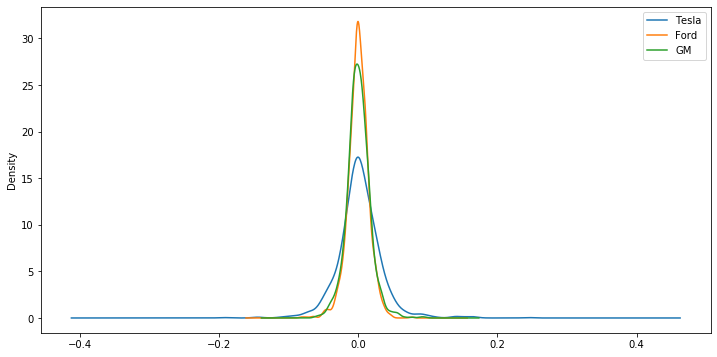

In [106]:
tesla["Returns"].plot.kde(figsize=(12,6), label="Tesla")
ford["Returns"].plot.kde(label="Ford")
gm["Returns"].plot.kde(label="GM")

plt.legend()

** We are creating some box plots comparing the returns. **

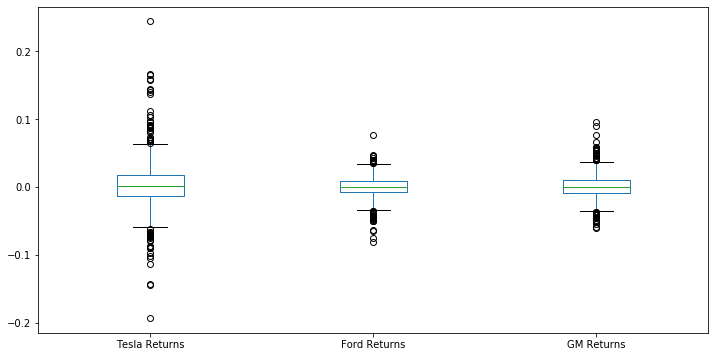

In [130]:
box_comp=pd.concat([tesla["Returns"], ford["Returns"], gm["Returns"]], axis=1 )
box_comp.columns=["Tesla Returns", "Ford Returns", "GM Returns"]
box_comp.plot.box(figsize=(12,6))

# Comparing Daily Returns between Stocks

** Let's create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF698A7C88>,
      dtype=object)

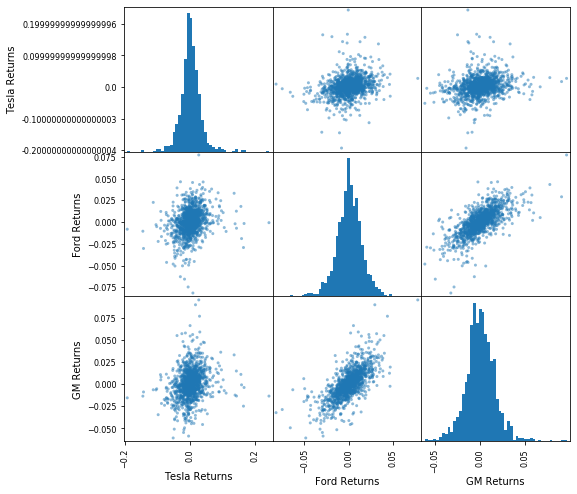

In [129]:

scatter_matrix(box_comp, figsize=(8,8), hist_kwds={'bins':50}, alpha=0.5)

** It looks like Ford and GM do have some sort of possible relationship, let's plot these two against eachother in scatter plot to view this more closely!**

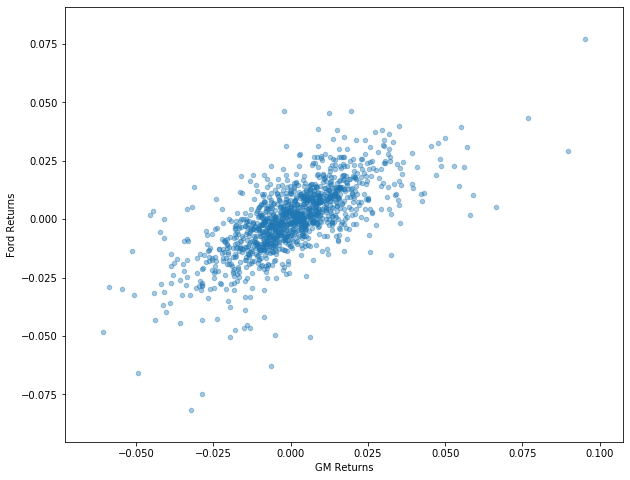

In [134]:
box_comp.plot(kind='scatter',x='GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

# Cumulative Daily Returns

In [138]:
tesla["Cummulative Returns"]=(1+tesla["Returns"]).cumprod()
ford["Cummulative Returns"]=(1+ford["Returns"]).cumprod()
gm["Cummulative Returns"]=(1+gm["Returns"]).cumprod()

** Now plot the Cumulative Return columns against the time series index. Tesla showed the highest return for a $1 invested.

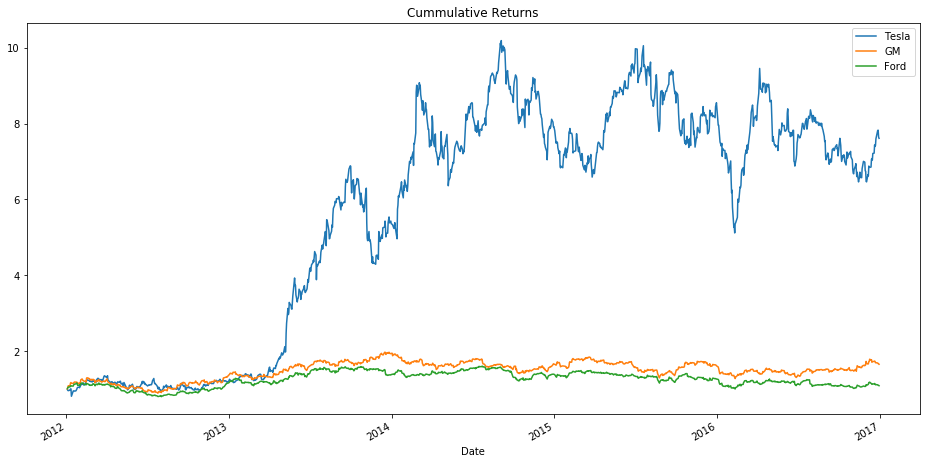

In [143]:
tesla["Cummulative Returns"].plot(figsize=(16,8), title="Cummulative Returns", label="Tesla")
gm["Cummulative Returns"].plot(label="GM")
ford["Cummulative Returns"].plot(label="Ford")

plt.legend()